In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('C:/Users/AjithKumar.Pola/Downloads/cluster_credit_data.csv')

In [51]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [53]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [54]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [55]:
df ['Saving accounts'] = df ['Saving accounts'].fillna (0)
df ['Checking account'] = df ['Checking account'].fillna (0)

In [56]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [57]:
df.drop(['Unnamed: 0'], axis = 1, inplace= True)
# checking the modified dataset:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,0,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,0,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


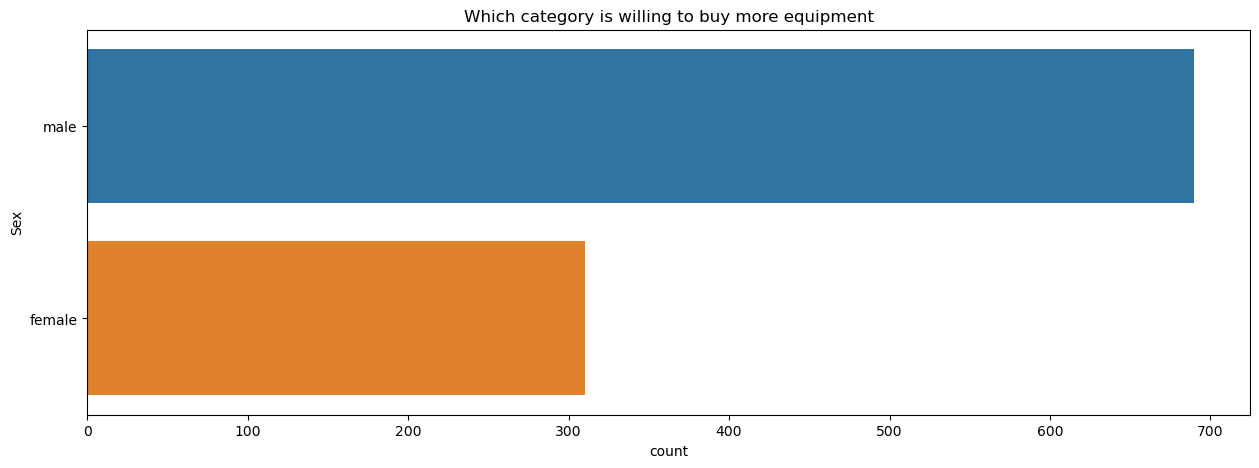

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'Sex' , data  = df)
plt.title('Which category is willing to buy more equipment')
plt.show()

C:\Users\AjithKumar.Pola\TOSHIBA\jupiter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AjithKumar.Pola\TOSHIBA\jupiter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AjithKumar.Pola\TOSHIBA\jupiter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

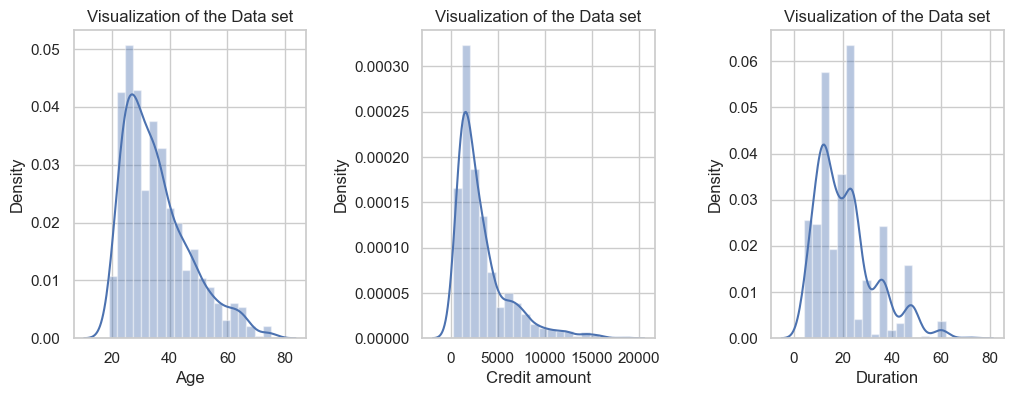

In [92]:
plt.figure(1, figsize=(12,4))
n = 0
for x in ['Age','Credit amount','Duration']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace= 0.5, wspace=0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Visualization of the Data set'.format(x))
plt.show()

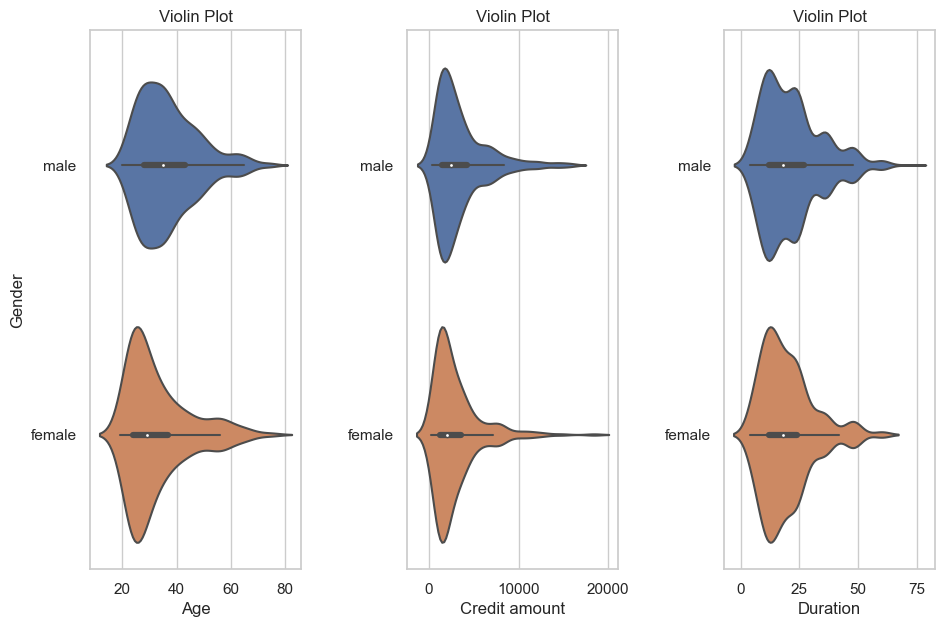

In [93]:
#used for the distribution of numerical data
plt.figure(1, figsize=(15,7))
n = 0
for x in ['Age','Credit amount','Duration']:
    n+=1
    plt.subplot(1,4,n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace= 0.5, wspace=0.5)
    sns.violinplot(x = x,y = 'Sex', data = df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')
plt.show()

C:\Users\AjithKumar.Pola\TOSHIBA\jupiter\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


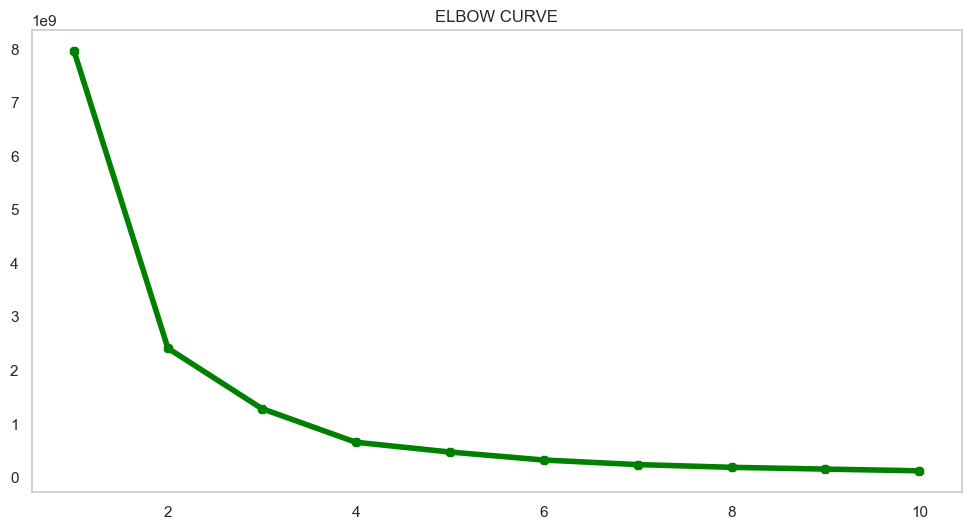

In [138]:
X1 = df.loc[:,['Age','Credit amount','Duration']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 4, color = 'Green', marker = '8')
plt.title('ELBOW CURVE')
plt.show()

In [119]:
X1 = df.loc[:,['Age','Credit amount','Duration']].values
print(X1)

[[  67 1169    6]
 [  22 5951   48]
 [  49 2096   12]
 ...
 [  38  804   12]
 [  23 1845   45]
 [  27 4576   45]]


In [144]:
X1 = df.loc[:,['Age','Credit amount','Duration']].values
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X1)
print(kmeans.cluster_centers_)



[[   35.61029412  1471.31066176    15.08272059]
 [   36.66666667 12511.71428571    40.26190476]
 [   34.68309859  3587.30633803    23.49295775]
 [   36.8         7127.52307692    33.34615385]]


In [145]:
X1 = df.loc[:,['Age','Credit amount','Duration']].values
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X1)
print(kmeans.cluster_centers_)


[[   34.83        3098.08666667    22.34333333]
 [   36.96969697 13133.90909091    38.6969697 ]
 [   36.62931034  5570.21551724    29.54310345]
 [   35.50420168  1344.72268908    14.22478992]
 [   36.37333333  8295.73333333    36.33333333]]


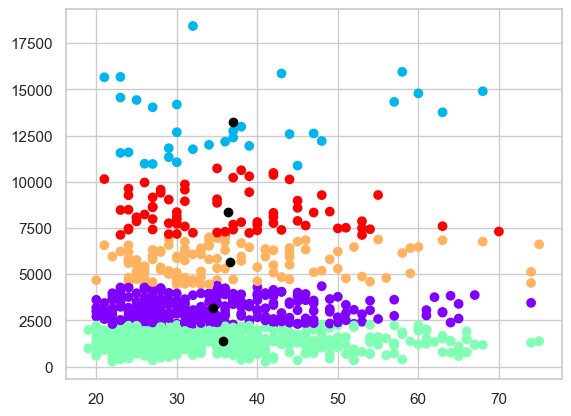

In [121]:
X1 = df.loc[:,['Age','Credit amount','Duration']].values
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.show()

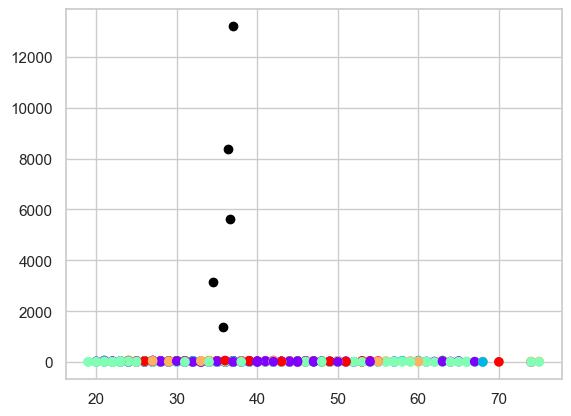

In [122]:
plt.scatter(X1[:,0],X1[:,2], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.show()

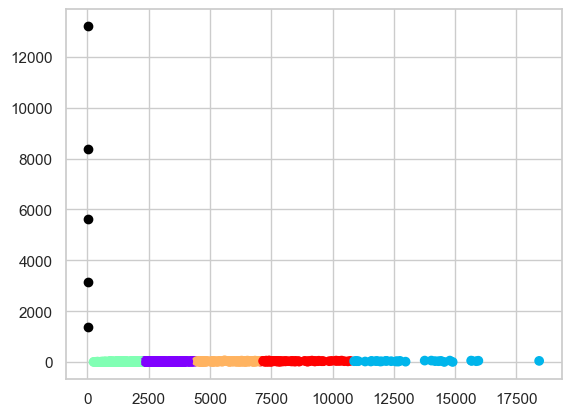

In [123]:
plt.scatter(X1[:,1],X1[:,2], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.show()

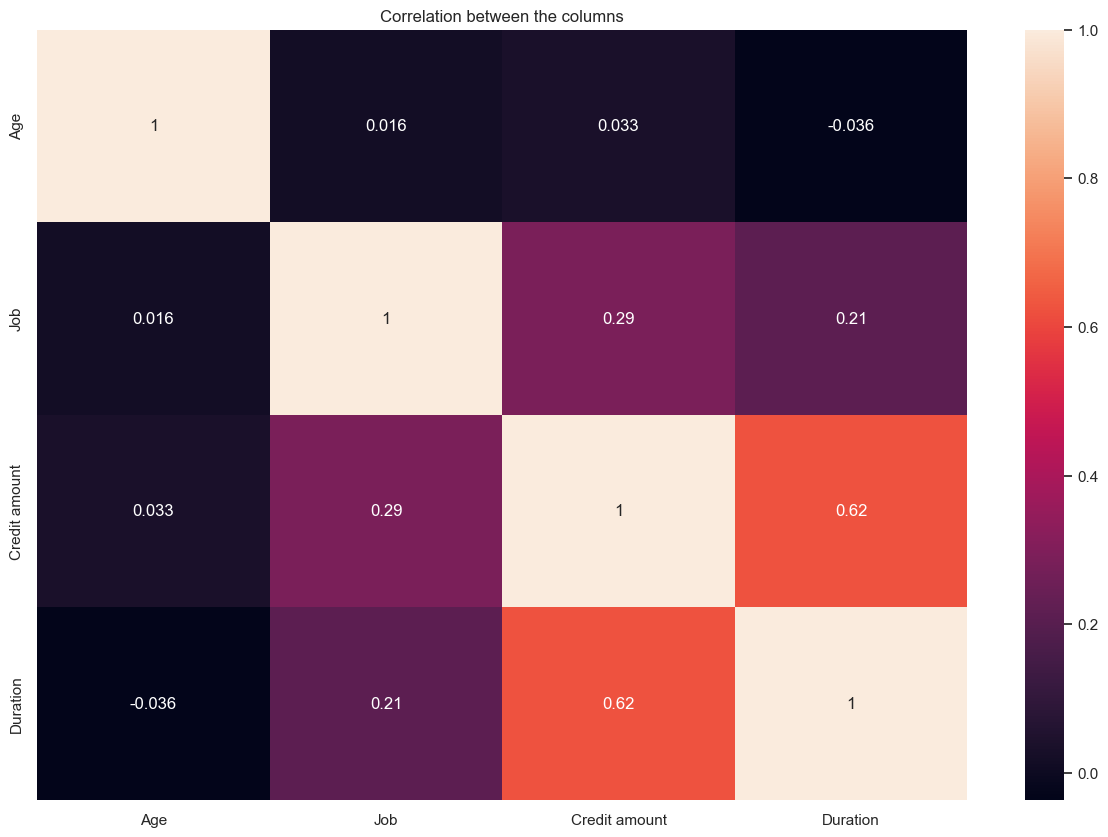

In [125]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [126]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [128]:
X1 = df.loc[:,['Age','Credit amount','Duration']].values
clusters = kmeans.fit_predict(X1)
df['label'] = clusters


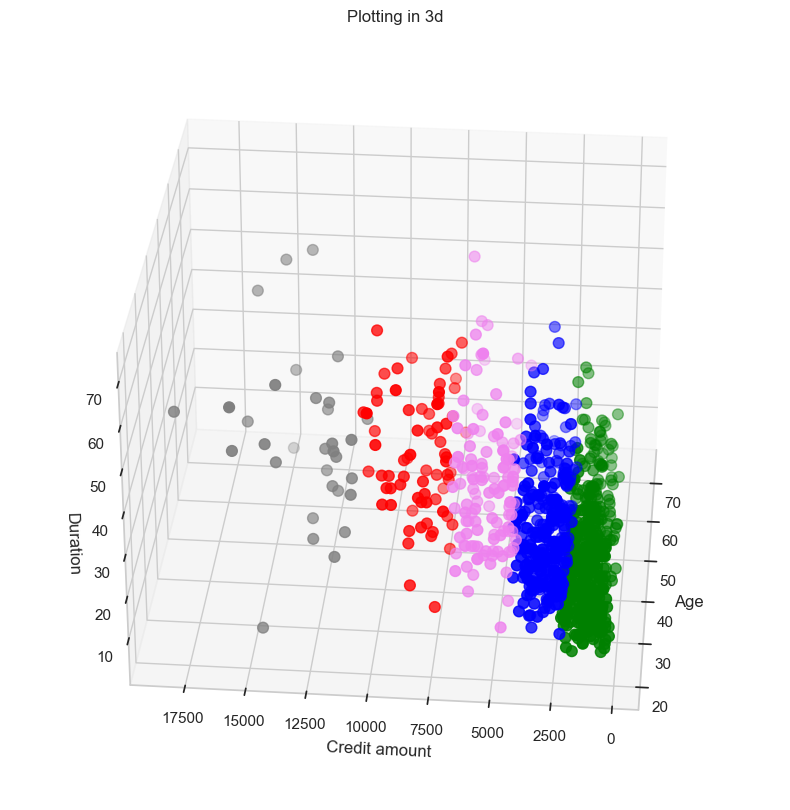

In [137]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df['Credit amount'][df.label == 0], df['Duration'][df.label == 0], c = 'blue', s = 60)
ax.scatter(df.Age[df.label == 1], df['Credit amount'][df.label == 1], df['Duration'][df.label == 1],  c = 'red', s = 60)
ax.scatter(df.Age[df.label == 2], df['Credit amount'][df.label == 2], df['Duration'][df.label == 2],  c = 'green', s = 60)
ax.scatter(df.Age[df.label == 3], df['Credit amount'][df.label == 3], df['Duration'][df.label == 3],  c = 'gray', s = 60)
ax.scatter(df.Age[df.label == 4], df['Credit amount'][df.label == 4], df['Duration'][df.label == 4],  c = 'Violet', s = 60)
ax.view_init(30,185)
plt.title('Plotting in 3d')
plt.xlabel('Age')
plt.ylabel('Credit amount')
ax.set_zlabel('Duration')
plt.show()